# Etude d'un jeu de données : caractéristiques de 3 espèces de faucons

Nous avons trouvé à cette [adresse](https://www.picostat.com/dataset/r-dataset-package-stat2data-hawks?fbclid=IwAR3sSZpCuSP1uZoiSmoZQRoNLA69l-pBcldyyub-9DQjYI92uaq7B4WDUK4) un dataset d'étude de faucons. On y retrouve 3 espèces avec leurs caractéristiques. Notre objectif sera d'étudier l'influence de chaque caractéristiques sur l'espèce de faucon ainsi que la corrélation de certaines de ces caractéristiques.

## Voici les caractéristiques de notre dataset :

* **Species** : CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned
* **Age** : A=Adult or I=Imature
* **Sex** : F=Female or M=Male
* **Wing** : Length (in mm) of primary wing feather from tip to wrist it attaches to
* **Weight** : Body weight (in gm)
* **Culmen** : Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird
* **Hallux** : Length (in mm) of the killing talon
* **Tail** : Measurement (in mm) related to the length of the tail (invented at the MacBride Raptor Center)

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('https://www.picostat.com/system/files/datasets/dataset-48225.csv')
data

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.7,30.1,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.7,31.3,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.7,23.5,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.5,14.3,157,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,11,18,2003,14:44,,1177-04777,RT,I,NaN,380.0,1525.0,26.0,27.6,224,227.0,NaN,NaN,3.0,0.0
904,11,19,2003,10:18,,803-05985,SS,I,F,190.0,175.0,12.7,15.4,150,153.0,NaN,NaN,4.0,0.0
905,11,19,2003,12:02,,1807-53145,RT,I,NaN,360.0,790.0,21.9,27.6,211,215.0,NaN,NaN,2.0,0.0
906,11,20,2003,9:56,,1177-04778,RT,I,NaN,369.0,860.0,25.2,28.0,207,210.0,NaN,NaN,2.0,0.0


## Nettoyage du dataset

On va ne conserver nottament que les données chiffrés que l'on peut exploiter dans le dataset :

In [8]:
cols = ['Species', 'Age', 'Sex', 'Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']
data_new = data[cols]
data_new

,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail
0,RT,I,NaN,385.0,920.0,25.7,30.1,219
1,RT,I,NaN,376.0,930.0,NaN,NaN,221
2,RT,I,NaN,381.0,990.0,26.7,31.3,235
3,CH,I,F,265.0,470.0,18.7,23.5,220
4,SS,I,F,205.0,170.0,12.5,14.3,157
...,...,...,...,...,...,...,...,...
903,RT,I,NaN,380.0,1525.0,26.0,27.6,224
904,SS,I,F,190.0,175.0,12.7,15.4,150
905,RT,I,NaN,360.0,790.0,21.9,27.6,211
906,RT,I,NaN,369.0,860.0,25.2,28.0,207


In [11]:
data_new.describe()

,Wing,Weight,Culmen,Hallux,Tail
count,907.000000,898.000000,901.000000,902.000000,908.000000
mean,315.637486,772.080178,21.801498,26.410865,198.831498
std,95.277591,462.311760,7.284175,17.734704,36.824403
min,37.200000,56.000000,8.600000,9.500000,119.000000
25%,202.000000,185.000000,12.800000,15.100000,160.000000
50%,370.000000,970.000000,25.500000,29.400000,214.000000
75%,390.000000,1120.000000,27.300000,31.400000,225.000000
max,480.000000,2030.000000,39.200000,341.400000,288.000000


## Etude des caractéristiques & corrélations

On affiche les caractéristiques propres aux différentes espèces :

In [44]:
for name in data_new['Species'].unique():
    print("Species:", name)
    display(data_new[data_new['Species'] == name].describe())

Species: RT


,Wing,Weight,Culmen,Hallux,Tail
count,577.00000,572.00000,573.000000,574.000000,577.000000
mean,383.30364,1094.43007,26.965969,31.993990,222.149047
std,31.48714,189.21025,2.050474,17.666668,14.510962
min,37.20000,101.00000,15.700000,10.300000,122.000000
25%,372.00000,980.00000,25.800000,29.600000,214.000000
50%,384.00000,1070.00000,26.800000,30.800000,221.000000
75%,399.00000,1210.00000,28.100000,32.200000,230.000000
max,480.00000,2030.00000,39.200000,341.400000,288.000000


Species: CH


,Wing,Weight,Culmen,Hallux,Tail
count,69.000000,70.000000,70.000000,70.000000,70.000000
mean,244.144928,420.485714,17.565714,22.818571,200.914286
std,32.132664,162.031643,2.392857,5.416963,17.880232
min,145.000000,56.000000,12.200000,13.800000,157.000000
25%,227.000000,335.000000,16.025000,19.925000,186.250000
50%,240.000000,377.500000,17.100000,21.600000,199.000000
75%,260.000000,505.000000,19.200000,24.000000,215.000000
max,377.000000,1119.000000,25.400000,54.500000,233.000000


Species: SS


,Wing,Weight,Culmen,Hallux,Tail
count,261.000000,256.000000,258.000000,258.000000,261.000000
mean,184.946360,147.968750,11.480814,14.964147,146.724138
std,22.421937,80.652675,1.905509,13.936655,15.676310
min,143.000000,85.000000,8.600000,9.500000,119.000000
25%,166.000000,100.000000,10.000000,11.500000,133.000000
50%,191.000000,155.000000,11.700000,13.950000,150.000000
75%,199.000000,177.750000,12.300000,14.775000,158.000000
max,370.000000,1094.000000,27.300000,143.000000,221.000000


### Affichage des caractéristiques par espèce

Un peu de **DataViz** sur nos espèces

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

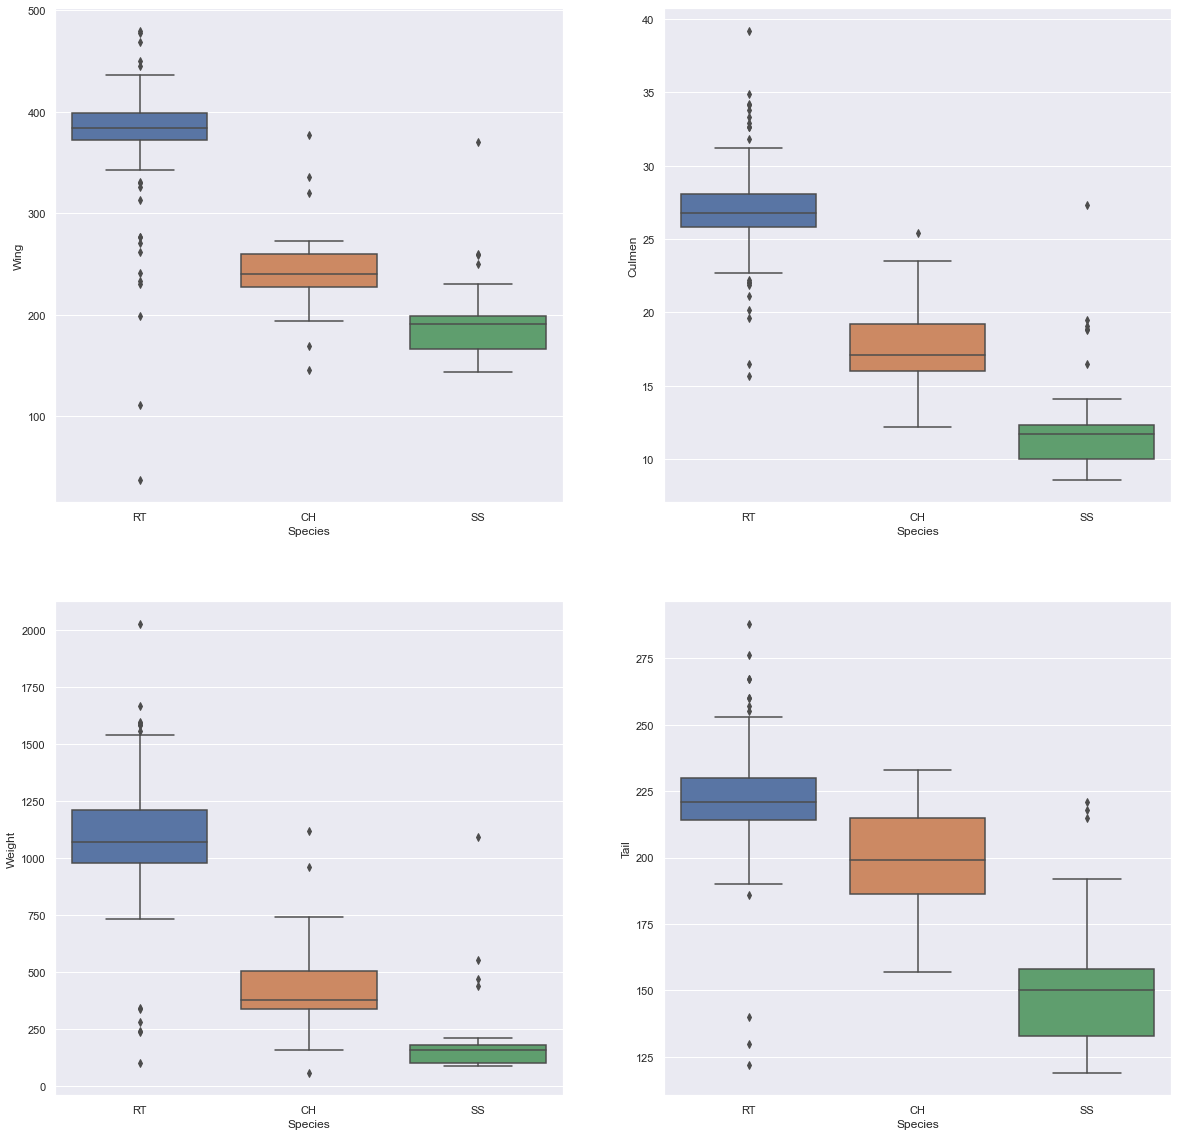

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20)) 

sns.boxplot(x='Species',
            y= 'Wing',
            data=data_new,              
            ax=ax[0,0])

sns.boxplot(x='Species',
            y= 'Weight',
            data=data_new,              
            ax=ax[1,0])

sns.boxplot(x='Species',
            y= 'Culmen',
            data=data_new,              
            ax=ax[0,1])

sns.boxplot(x='Species',
            y= 'Tail',
            data=data_new,              
            ax=ax[1,1])

plt.show() 

### Affichage de chaque caractéristique en fonction de chacune des autres caractéristiques

On colorise chaque espèce de manière différente.


<Figure size 720x720 with 0 Axes>

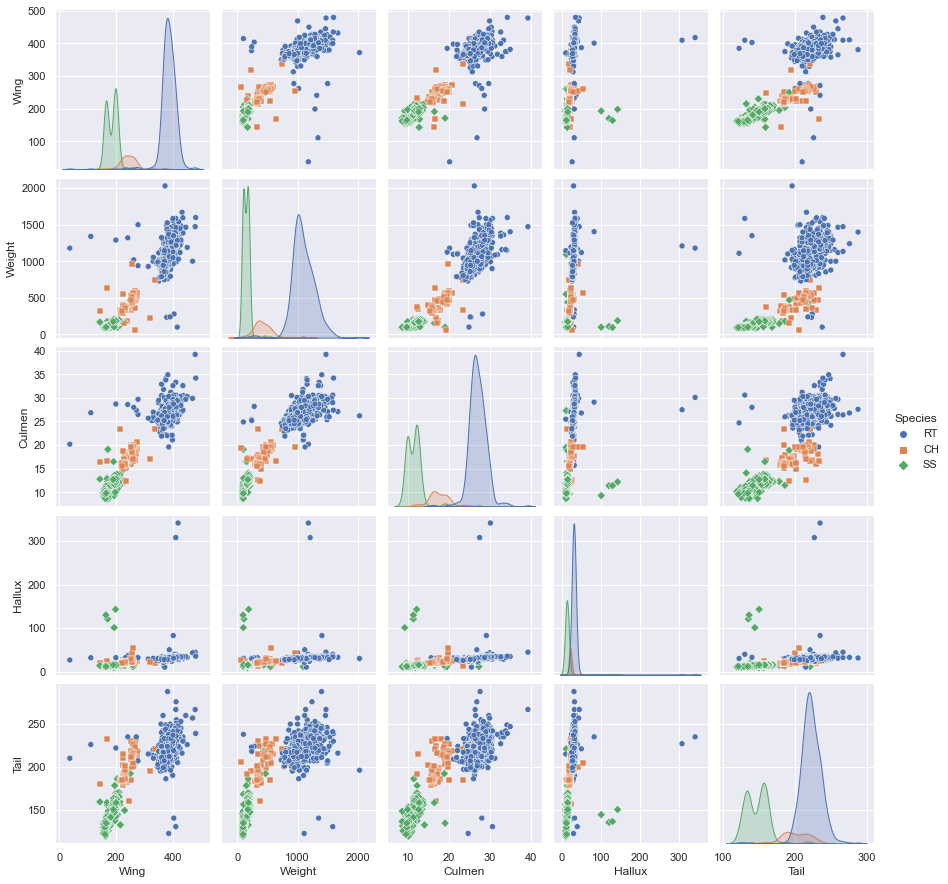

In [21]:
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data_new, hue="Species", markers=["o", "s", "D"])
plt.show()

### Corrélations des caractéristiques, sur l'ensemble des espèces 

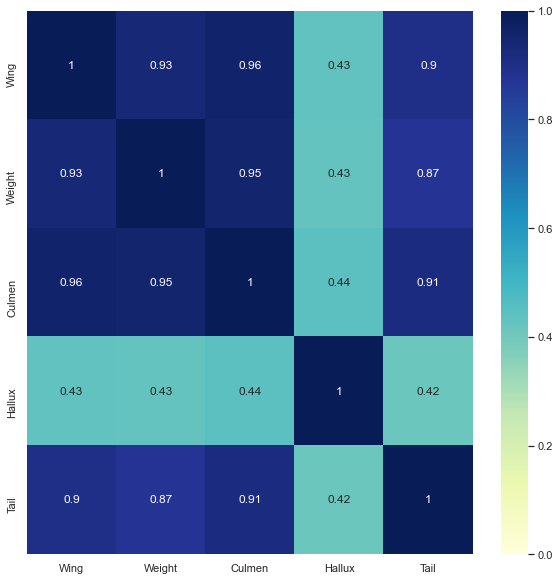

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_new.corr(), 
            annot=True, 
            vmin=0, 
            vmax=1,
            ax=ax,
            cmap="YlGnBu")
plt.show()

On remarque qu'**Hallux** est trés peu corrélé avec les autres données.

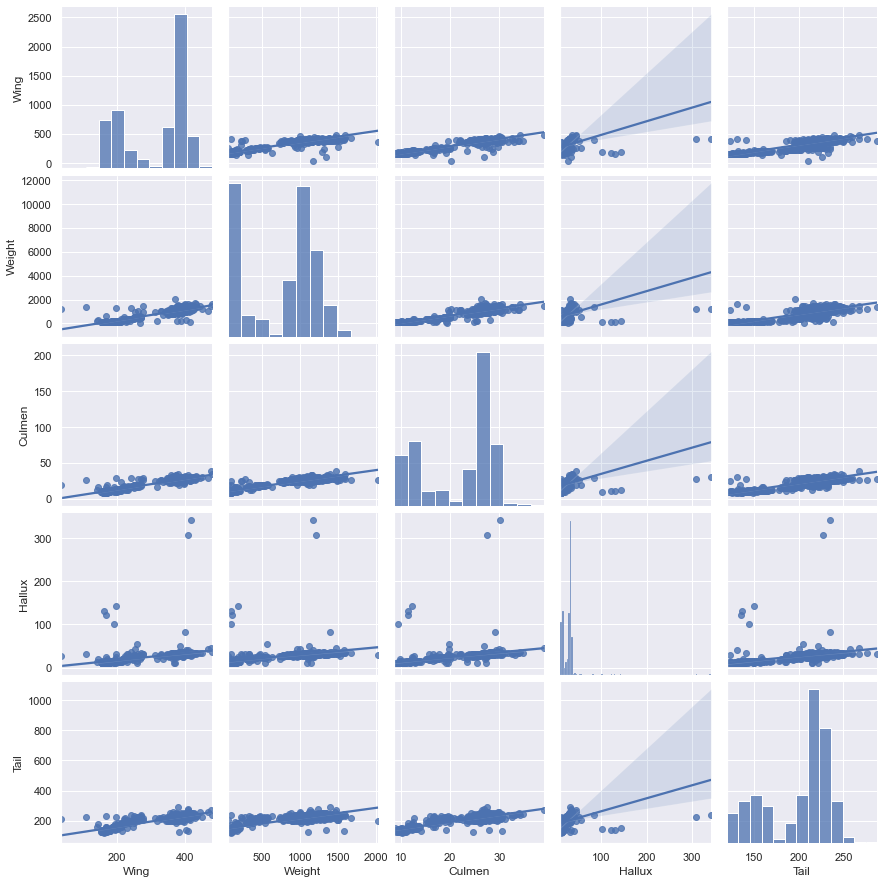

In [20]:
sns.pairplot(data_new, kind="reg")

plt.show()

### Corrélation des caractéristiques, par espèce

In [27]:
data_new.groupby('Species').corr()

Wing    Weight    Culmen    Hallux      Tail
Species                                                         
CH      Wing    1.000000  0.547826  0.653409  0.221724  0.541650
        Weight  0.547826  1.000000  0.660705  0.426994  0.561783
        Culmen  0.653409  0.660705  1.000000  0.233066  0.533846
        Hallux  0.221724  0.426994  0.233066  1.000000  0.267886
        Tail    0.541650  0.561783  0.533846  0.267886  1.000000
RT      Wing    1.000000  0.336467  0.430485  0.100771  0.320376
        Weight  0.336467  1.000000  0.543931  0.098991  0.256490
        Culmen  0.430485  0.543931  1.000000  0.134772  0.351333
        Hallux  0.100771  0.098991  0.134772  1.000000  0.081847
        Tail    0.320376  0.256490  0.351333  0.081847  1.000000
SS      Wing    1.000000  0.862904  0.831481  0.058161  0.871766
        Weight  0.862904  1.000000  0.862206  0.021954  0.763939
        Culmen  0.831481  0.862206  1.000000  0.053842  0.777119
        Hallux  0.058161  0.021954  0.053842  1.000000  0.045976
        Tail    0.871766  0.763939  0.777119  0.045976  1.000000

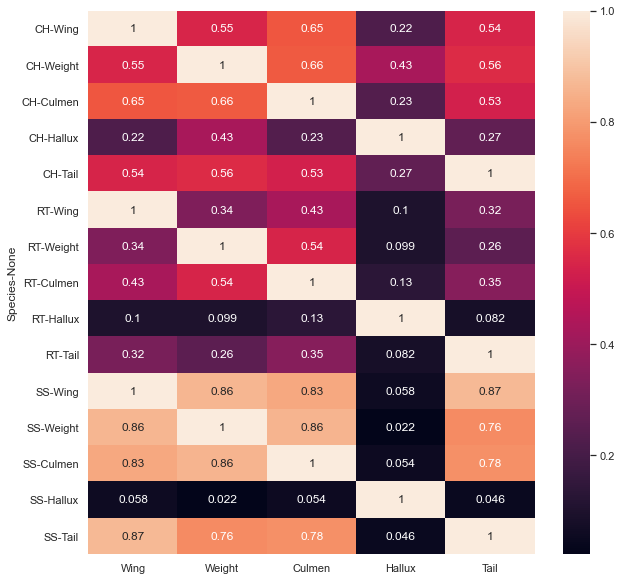

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_new.groupby('Species').corr(), annot=True)
plt.show()

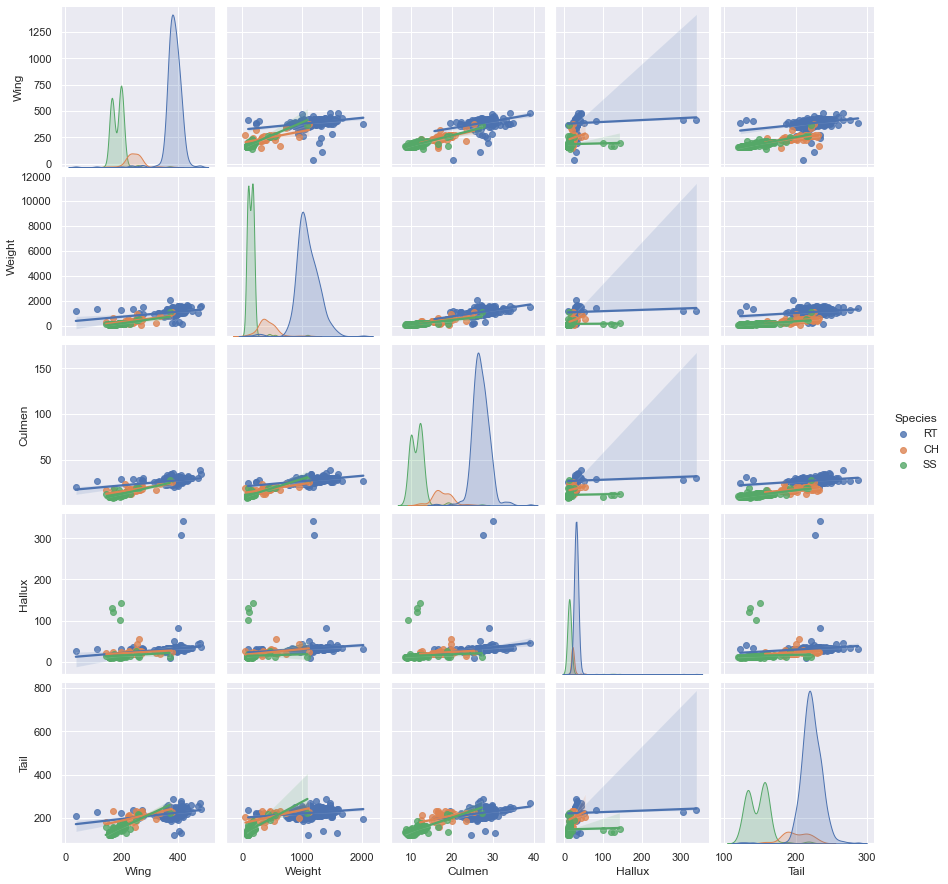

In [29]:
sns.pairplot(data_new, hue="Species", kind="reg")
plt.show()

## ACP : analyse en composantes principales

Nous allons remplacer les **NaN** dans notre dataset par la moyenne de la colonne associer.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
moyennes = data_new.loc[:,:].mean()
moyennes

Wing      315.637486
Weight    772.080178
Culmen     21.801498
Hallux     26.410865
Tail      198.831498
dtype: float64

In [38]:
cols_acp = ['Wing', 'Weight', 'Culmen', 'Hallux', 'Tail']
data_acp = data_new.fillna(moyennes)[cols_acp] # on remplace les Na par la valeur associée à la clé du dict de nom de la colonne.
data_acp

,Wing,Weight,Culmen,Hallux,Tail
0,385.0,920.0,25.700000,30.100000,219
1,376.0,930.0,21.801498,26.410865,221
2,381.0,990.0,26.700000,31.300000,235
3,265.0,470.0,18.700000,23.500000,220
4,205.0,170.0,12.500000,14.300000,157
...,...,...,...,...,...
903,380.0,1525.0,26.000000,27.600000,224
904,190.0,175.0,12.700000,15.400000,150
905,360.0,790.0,21.900000,27.600000,211
906,369.0,860.0,25.200000,28.000000,207


### Centrer et réduire les données

In [39]:
scaler = StandardScaler()

data_acp = pd.DataFrame(scaler.fit_transform(data_acp), columns=data_acp.columns)

data_acp

,Wing,Weight,Culmen,Hallux,Tail
0,0.728808,0.321913,5.375749e-01,2.088244e-01,0.547996
1,0.634243,0.343675,-1.469680e-15,-2.011022e-16,0.602338
2,0.686779,0.474251,6.754677e-01,2.767506e-01,0.982730
3,-0.532059,-0.657406,-4.276740e-01,-1.647702e-01,0.575167
4,-1.162493,-1.310286,-1.282609e+00,-6.855383e-01,-1.136598
...,...,...,...,...,...
903,0.676271,1.638553,5.789428e-01,6.731128e-02,0.683850
904,-1.320101,-1.299405,-1.255030e+00,-6.232726e-01,-1.326794
905,0.466127,0.038998,1.358266e-02,6.731128e-02,0.330629
906,0.560692,0.191337,4.686286e-01,8.995337e-02,0.221945


In [40]:
pca = PCA() 
pca.fit(data_acp)

PCA()

In [41]:
pca.explained_variance_ratio_[0]

0.8001863735140662

80% de l'information est expliquée par cet axe.

In [42]:
U = np.transpose(pca.components_)

U

array([[ 0.4843712 , -0.13821051,  0.14576144, -0.75581662, -0.39214439],
       [ 0.47963319, -0.13659763,  0.51197005,  0.60928215, -0.3434458 ],
       [ 0.48838789, -0.13105105,  0.1587179 , -0.07087446,  0.84503747],
       [ 0.27513784,  0.9613189 , -0.0097919 ,  0.00272649, -0.00786326],
       [ 0.47022652, -0.14467391, -0.83147641,  0.22909796, -0.11881748]])

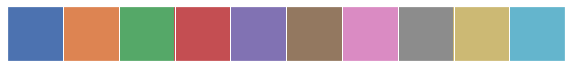

In [43]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [44]:
colors = [current_palette[0], current_palette[2], current_palette[3]]
faucon_colors = [colors[i // 350] for i in range(len(data_acp))]

In [45]:
C = pd.DataFrame(data_acp.dot(U[:,0]))

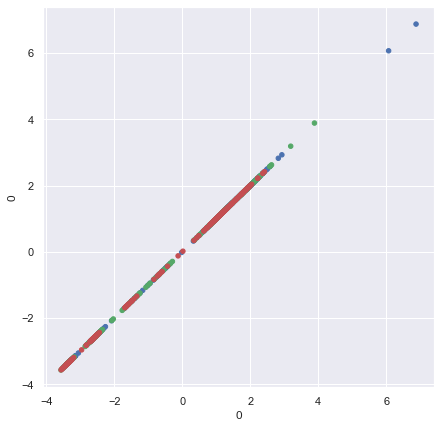

In [46]:
fig, ax = plt.subplots(figsize=(7, 7)) 

C.plot.scatter(0, 0, # en x et en y le même axe
               color=faucon_colors, 
               ax=ax)

plt.show() 